# Esercizio 
Sul database titanic, effettuiamo le seguenti analisi: 
- Riusciamo a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna Cabin)?
- Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna PClass)
- Fare la stessa cosa per la colonna Survived
- Qual era la distribuzione delle tariffe (Fare)?
- Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un boxplot?
- Visualizziamo un boxplot rispetto alle colonne Fare e Survived; che cose ne deduciamo?

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

path = str(Path(os.path.abspath("")).parents[0]) + '\\' + "adventureworks_connection.ipynb"
path = path.replace('\\', '/')
%run {path}

connected


In [2]:
titanic_df = pd.read_sql("SELECT * FROM titanic", titanic_db_engine)

titanic_df

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [3]:
titanic_df.Cabin[27].split(' ')

['C23', 'C25', 'C27']

In [4]:
cabin_unique = titanic_df.Cabin.str.split(' ').explode().str.replace('[0-9]', '', regex = True).drop_duplicates()
cabin_unique

0       
1      C
6      E
10     G
21     D
23     A
31     B
66     F
339    T
Name: Cabin, dtype: object

<Axes: ylabel='PClass'>

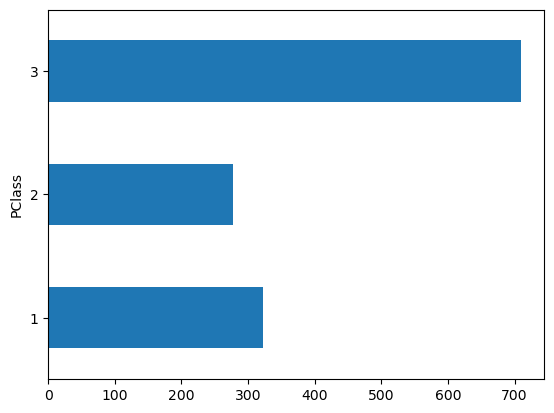

In [5]:
titanic_df.groupby('PClass')['Name'].count().plot(kind = 'barh')

<Axes: ylabel='Survived'>

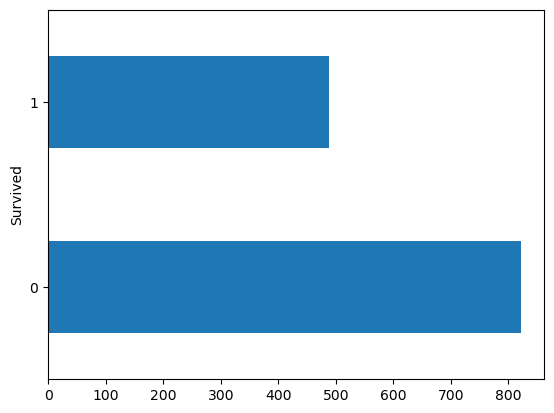

In [6]:
titanic_df.groupby('Survived')['Name'].count().plot(kind = 'barh')

<Axes: ylabel='Frequency'>

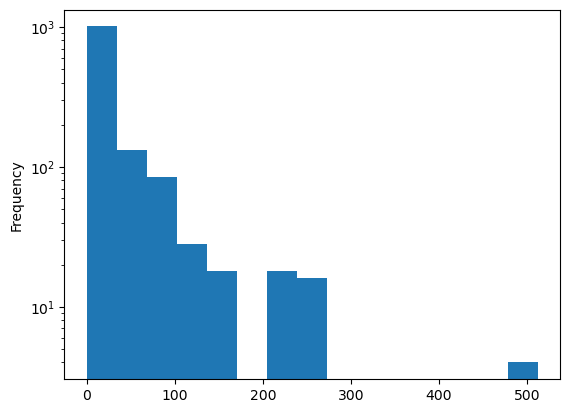

In [7]:
titanic_df['Fare'].plot(kind = 'hist', logy = True, bins = 15)

<Axes: xlabel='PClass', ylabel='Age'>

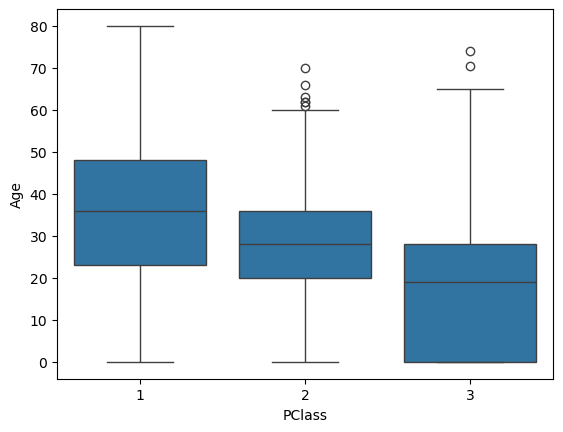

In [8]:
sns.boxplot(data = titanic_df, y = 'Age', x = 'PClass')

<Axes: xlabel='Survived', ylabel='Fare'>

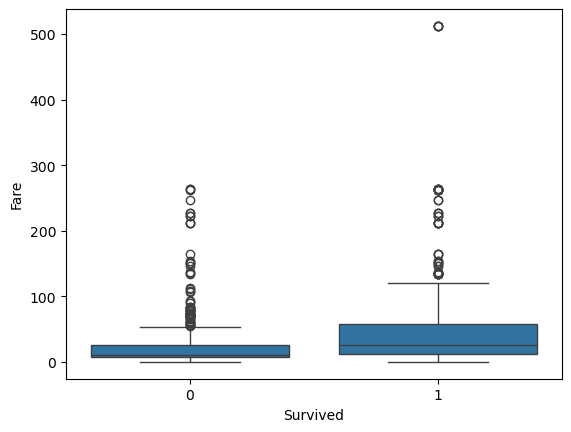

In [9]:
sns.boxplot(data = titanic_df, y = 'Fare', x = 'Survived')

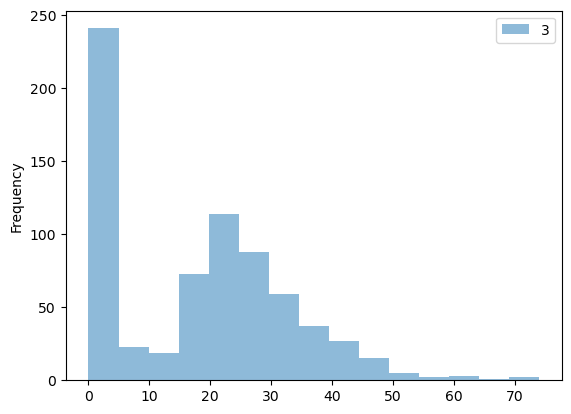

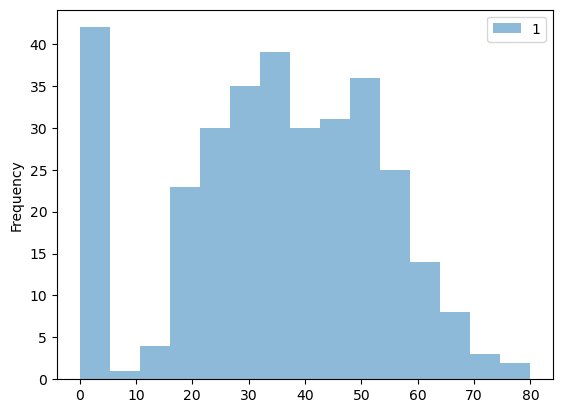

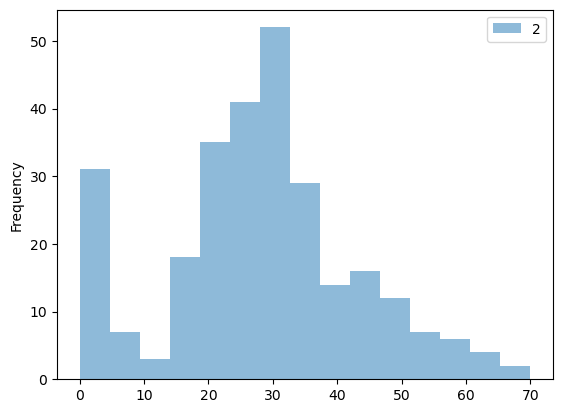

In [10]:
import matplotlib.pyplot as plt

for pclass in titanic_df['PClass'].unique():
    plcass_ages = titanic_df[ titanic_df['PClass'] == pclass ].groupby('PClass')['Age']
    plcass_ages.plot(kind = 'hist', bins = 15, alpha = 0.5, legend = True)
    plt.show()

# Esercizio 
Scarichiamo il dataset stockdata.csv da https://github.com/plotly/datasets/blob/master/stockdata.csv e: 
- Visualizziamo l'andamento delle azioni della Apple ("AAPL")
- Visualizziamo l'andamento di tutte le azioni del dataset
- Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
- Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso

In [11]:
stockdata_url = r'https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/stockdata.csv'
stockdata_df = pd.read_csv(stockdata_url)
stockdata_df

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


In [12]:
stockdata_df.Date.isna().value_counts()

Date
False    2306
Name: count, dtype: int64

In [13]:
stockdata_df.Date = pd.to_datetime(stockdata_df.Date)

stockdata_df = stockdata_df.set_index('Date')

<Axes: xlabel='Date'>

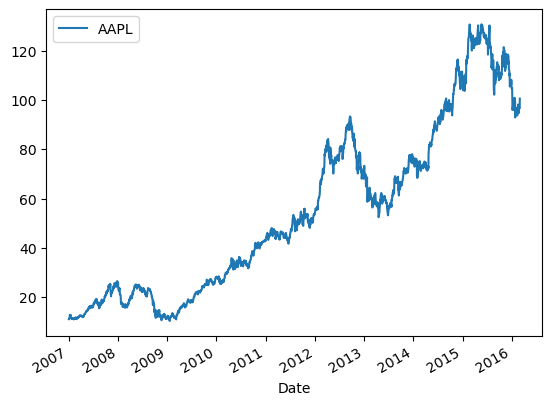

In [14]:
stockdata_df.plot(y = 'AAPL')

<Axes: xlabel='Date', ylabel='normalized data'>

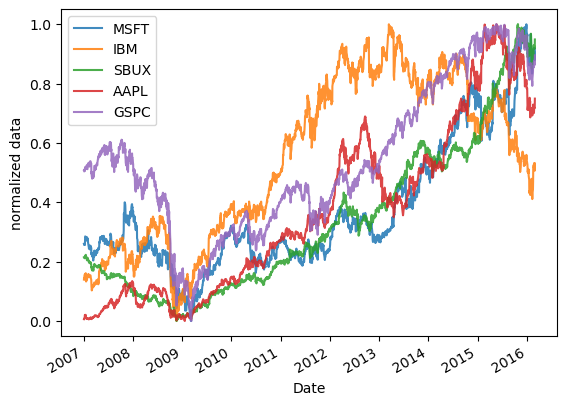

In [15]:
stockdata_df_norm = ((stockdata_df - stockdata_df.min()) / (stockdata_df.max() - stockdata_df.min()))
stockdata_df_norm.plot(ylabel='normalized data', alpha=0.85)

<Axes: xlabel='Date'>

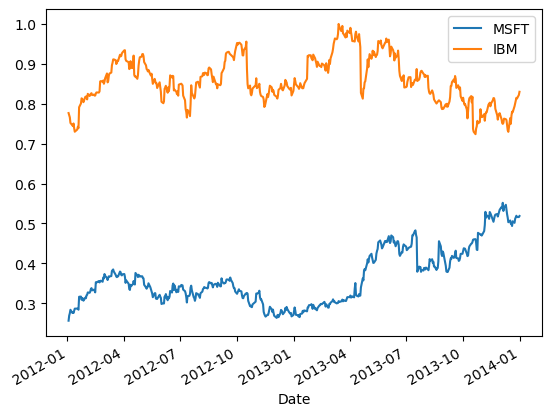

In [16]:
start_year = stockdata_df_norm.index.year >= 2012
end_year = stockdata_df_norm.index.year <= 2013
stockdata_df_norm[ start_year & end_year ][['MSFT', 'IBM']].plot()

<Axes: ylabel='Frequency'>

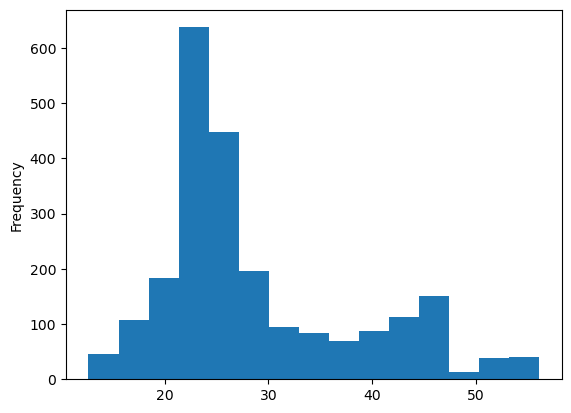

In [17]:
stockdata_df['MSFT'].plot(kind = 'hist', bins = 15)

# Esercizio 
Scarichiamo il dataset metal_bands_2017.csv dalla piattaforma e: 
- Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?
- Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine (nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare .loc[:, "style"] e non .style perché quest'ultimo è un metodo)
- Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [18]:
from pathlib import Path
import os

parent_folder = str(Path(os.path.abspath("")).parents[0]) + '\\'
metal_df = pd.read_csv(parent_folder + 'datasets\\altri_dataset\\metal_bands_2017.csv', encoding = 'latin')

metal_df

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [19]:
metal_df.set_index('Unnamed: 0')

,band_name,fans,formed,origin,split,style
Unnamed: 0,,,,,,
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"


In [20]:
metal_df.band_name.nunique()

4949

<Axes: xlabel='fans', ylabel='Count'>

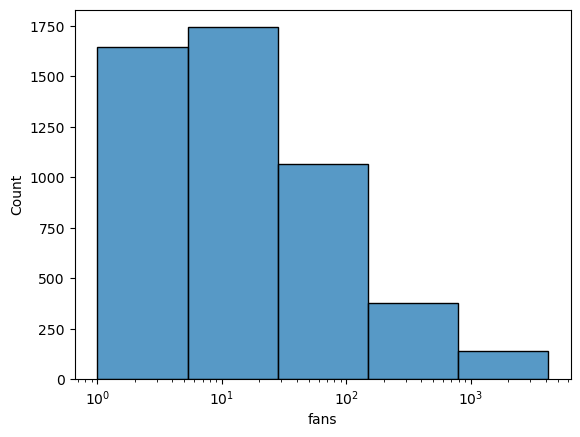

In [21]:
sns.histplot(metal_df, x='fans', bins=5, log_scale=True)

<Axes: xlabel='Country', ylabel='Fans'>

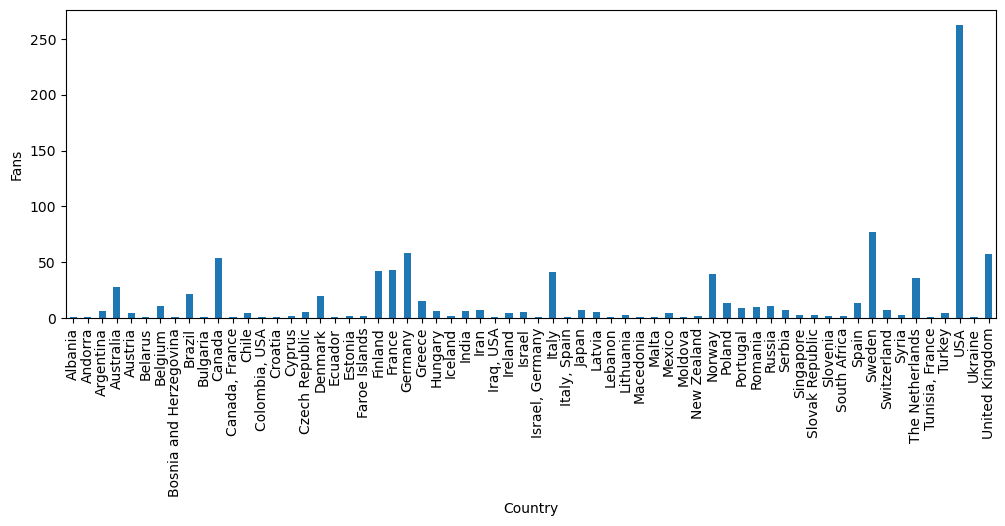

In [22]:
style_flt = metal_df['style'].str.contains('Progressive|Thrash')

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

metal_df[style_flt].groupby('origin')['fans'].count().plot(kind='bar', xlabel='Country', ylabel='Fans')

In [23]:
metal_df[ metal_df.formed == '-' ]

,Unnamed: 0,band_name,fans,formed,origin,split,style
4442,4442,Throes Of Sanity,2,-,USA,-,Us power
4599,4599,Doomocracy,1,-,Greece,-,Doom
4821,4821,Rustless,1,-,Italy,-,Heavy
4948,4948,Weapon UK,1,-,United Kingdom,-,"New wave of british heavy,Heavy"


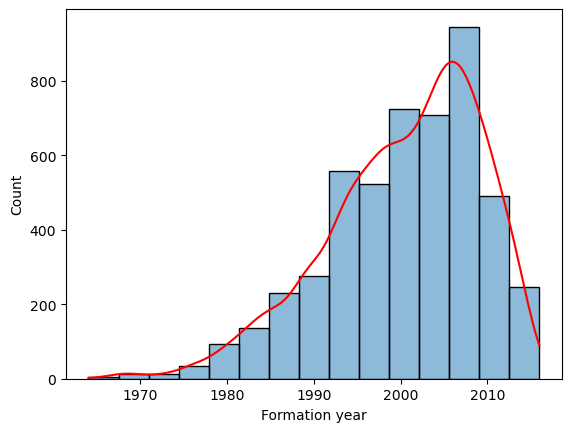

In [24]:
metal_df = metal_df.drop( metal_df[ metal_df.formed == '-' ].index )
metal_df.formed = metal_df.formed.astype(int)

ax = sns.histplot(metal_df, x='formed', bins=15, kde=True)
ax.set(xlabel = 'Formation year')
ax.lines[0].set_color('red')

# Esercizio 
Scarichiamo il dataset elections.csv da https://github.com/plotly/datasets/blob/master/election.csv : 
- Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)
- Con un grafico a barre confrontiamo il numero di votanti per i primi dieci distretti

In [25]:
election_df = pd.read_csv(parent_folder + 'datasets\\altri_dataset\\election.csv')
election_df

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


<Axes: ylabel='tot voti'>

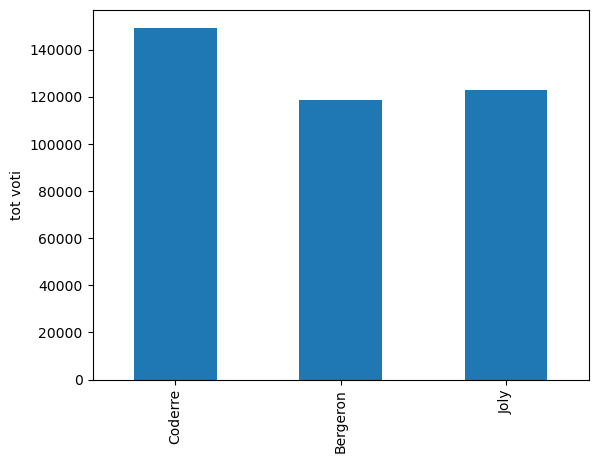

In [26]:
election_df[['Coderre', 'Bergeron', 'Joly']].sum().plot(kind='bar', ylabel='tot voti')

<Axes: xlabel='district id', ylabel='total'>

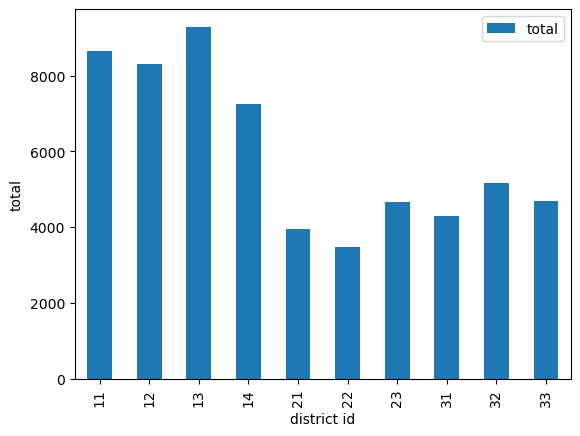

In [27]:
election_df.sort_values('district_id').iloc[:10].plot(kind='bar', x='district_id', y='total', xlabel='district id', ylabel='total')                                 

<Axes: xlabel='district id', ylabel='total'>

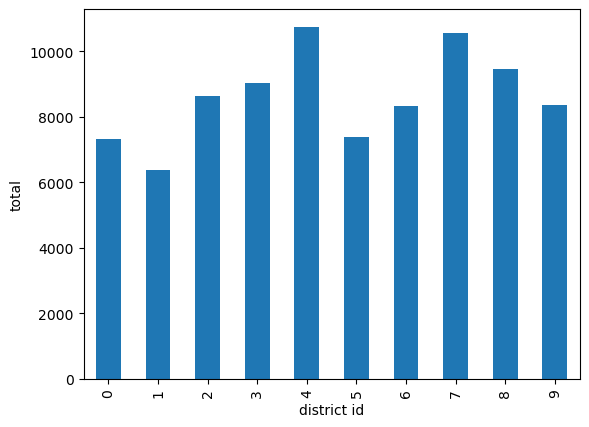

In [28]:
election_df.iloc[:10].total.plot(kind='bar', xlabel='district id', ylabel='total')    

# Esercizio 
Scarichiamo i file party_in_nyc.csv dal dataset https://www.kaggle.com/datasets/somesnm/partynyc relativo a quante volte è stata chiamata la polizia per delle feste eccessivamente rumorose: 
- Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale
- Qual è il rettangolo di latitudine e longitudine considerato dal dataset?
- Quante segnalazioni sono state fatte per case private?
- Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?

In [129]:
party_df = pd.read_csv(parent_folder + 'datasets\\altri_dataset\\party_in_nyc.csv')
party_df

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


<Axes: xlabel='City', ylabel='Call'>

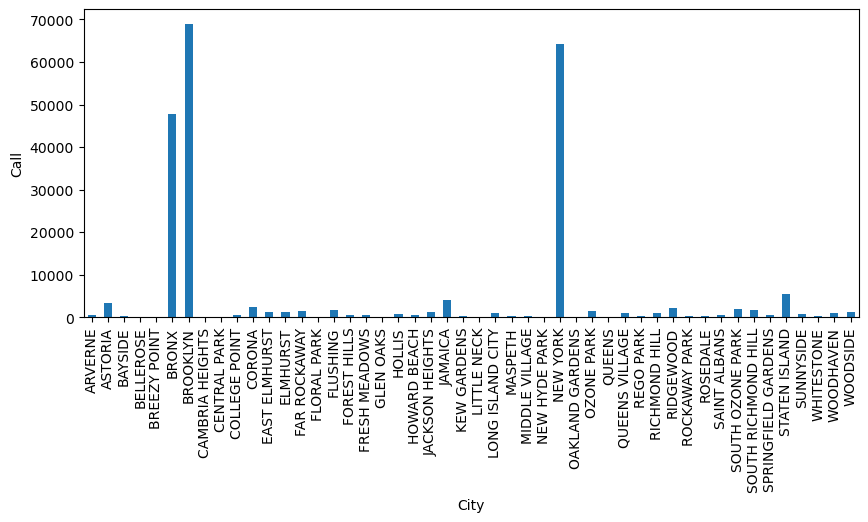

In [31]:
plt.figure(figsize=(10,4))
party_df.groupby('City')['Created Date'].count().plot(kind='bar', ylabel='Call')

In [32]:
party_df['Location Type'].unique()

array(['Store/Commercial', 'Residential Building/House',
       'Club/Bar/Restaurant', 'Street/Sidewalk', 'Park/Playground',
       'House of Worship'], dtype=object)

In [33]:
house_flt = party_df['Location Type'] == 'Residential Building/House'
print('Totale segnalazioni per case private:')
party_df[house_flt].dropna().groupby('Location Type').count().values[0,0]

Totale segnalazioni per case private:


145350

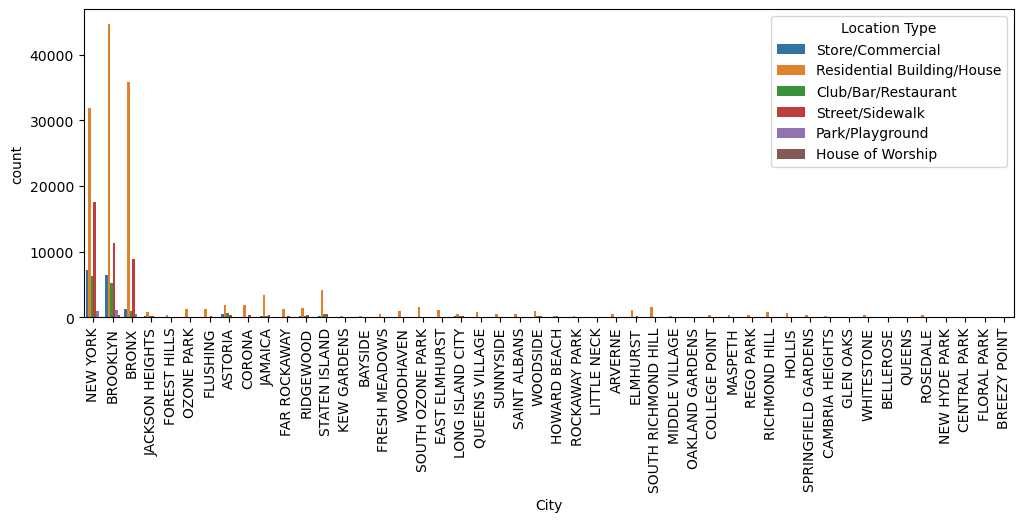

In [34]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
ax = sns.countplot(party_df, x='City', hue='Location Type')

In [63]:
party_df.iloc[:, -2:].describe()

,Latitude,Longitude
count,223784.000000,223784.000000
mean,40.749722,-73.924867
std,0.082081,0.063782
min,40.498820,-74.251277
25%,40.684638,-73.958217
50%,40.739153,-73.929682
75%,40.829290,-73.893262
max,40.912178,-73.702303


In [132]:
# Rimuovo il minimo perché troppo distante dagli altri
zip_min = party_df['Incident Zip'].unique().min()
print(zip_min)
party_df = party_df[party_df['Incident Zip'] > zip_min]

83.0


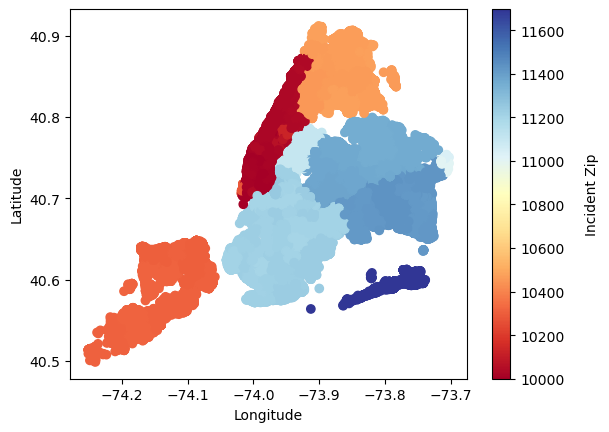

In [133]:
sc = plt.scatter(x=party_df['Longitude'], y=party_df['Latitude'], c=party_df['Incident Zip'], cmap='RdYlBu')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(sc)
cbar.set_label("Incident Zip", labelpad=15)
plt.show()

In [ ]:
party_df['Count'] = party_df.groupby('Incident Zip')['City'].transform('count')
party_df = party_df.dropna(subset='Count')

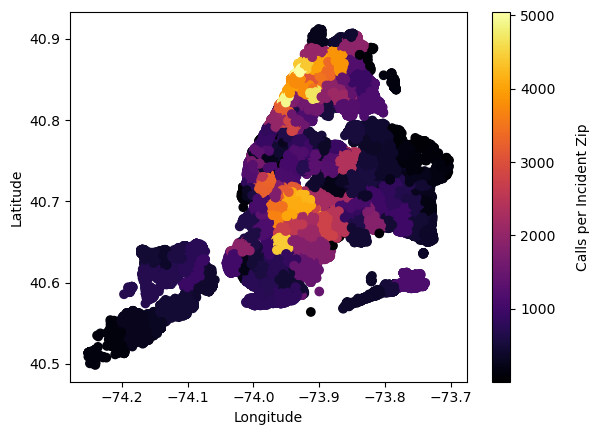

In [138]:
sc = plt.scatter(x=party_df['Longitude'], y=party_df['Latitude'], c=party_df['Count'], cmap='inferno')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(sc)
cbar.set_label("Calls per Incident Zip", labelpad=15)
plt.show()